In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()
import statsmodels.api as sm


In [2]:
raw_data=pd.read_csv('UCI_Credit_Card_new.csv')
raw_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,female,university,married,24.0,2,2,-1,-1,...,0.0,0,0.0,0,689,0.0,0,0,0,1
1,2,120000,female,university,single,26.0,-1,2,0,0,...,3272.0,3455,3261.0,0,1000,1000.0,1000,0,2000,1
2,3,90000,female,university,single,34.0,0,0,0,0,...,14331.0,14948,15549.0,1518,1500,1000.0,1000,1000,5000,0
3,4,50000,NaN,university,married,37.0,0,0,0,0,...,28314.0,28959,29547.0,2000,2019,1200.0,1100,1069,1000,0
4,5,50000,male,university,married,57.0,-1,0,-1,0,...,20940.0,19146,19131.0,2000,36681,10000.0,9000,689,679,0
5,6,50000,male,graduate school,single,37.0,0,0,0,0,...,19394.0,19619,20024.0,2500,1815,657.0,1000,1000,800,0
6,7,500000,male,graduate school,single,29.0,0,0,0,0,...,542653.0,483003,473944.0,55000,40000,38000.0,20239,13750,13770,0
7,8,100000,NaN,university,single,23.0,0,-1,-1,0,...,221.0,-159,567.0,380,601,0.0,581,1687,1542,0
8,9,140000,NaN,high school,married,28.0,0,0,2,0,...,12211.0,11793,3719.0,3329,0,432.0,1000,1000,1000,0
9,10,20000,male,high school,NaN,35.0,-2,-2,-2,-2,...,0.0,13007,13912.0,0,0,0.0,13007,1122,0,0


In [3]:
raw_data.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,29887,29839,29895,29907.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,29979.000000,30000.000000,29984.000000,30000.000000,3.000000e+04,29982.000000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,4,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,17999,13869,15859,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.511084,-0.016700,-0.133767,-0.166200,-0.220667,...,43243.390340,40311.400967,38851.271078,5663.580500,5.921163e+03,5225.949336,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.219739,1.123802,1.197186,1.196868,1.169139,...,64335.204543,60797.155770,59549.760630,16563.280354,2.304087e+04,17611.359280,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2319.000000,1763.000000,1255.000000,1000.000000,8.330000e+02,390.000000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,...,19034.000000,18104.500000,17046.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,...,54485.000000,50190.500000,49150.250000,5006.000000,5.000000e+03,4503.000000,4013.250000,4031.500000,4000.000000,0.000000


In [5]:
raw_data.isnull().sum()

ID                              0
LIMIT_BAL                       0
SEX                           113
EDUCATION                     161
MARRIAGE                      105
AGE                            93
PAY_0                           0
PAY_2                           0
PAY_3                           0
PAY_4                           0
PAY_5                           0
PAY_6                           0
BILL_AMT1                       0
BILL_AMT2                       0
BILL_AMT3                       0
BILL_AMT4                      21
BILL_AMT5                       0
BILL_AMT6                      16
PAY_AMT1                        0
PAY_AMT2                        0
PAY_AMT3                       18
PAY_AMT4                        0
PAY_AMT5                        0
PAY_AMT6                        0
default.payment.next.month      0
dtype: int64

In [6]:
data = raw_data.dropna(axis=0)

In [7]:
data.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,29536.000000,29536.000000,29536,29536,29536,29536.000000,29536.000000,29536.000000,29536.000000,29536.000000,...,29536.000000,29536.000000,29536.000000,29536.000000,2.953600e+04,29536.000000,29536.000000,29536.000000,29536.00000,29536.000000
unique,NaN,NaN,2,4,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,17809,13738,15655,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15010.905200,167641.849946,NaN,NaN,NaN,35.530437,-0.018350,-0.135868,-0.168913,-0.222440,...,43253.759175,40314.768858,38882.113996,5672.931338,5.914755e+03,5232.141082,4812.486288,4800.946134,5221.10929,0.220748
std,8610.560725,129826.915167,NaN,NaN,NaN,9.218141,1.122316,1.196176,1.195815,1.167597,...,64382.307107,60919.116132,59676.463509,16625.643870,2.302452e+04,17655.518245,15581.296242,15307.309901,17788.56403,0.414758
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7560.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2310.000000,1750.750000,1252.500000,1000.000000,8.357500e+02,390.000000,293.750000,251.000000,118.75000,0.000000
50%,14982.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,...,19032.500000,18072.500000,17023.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.00000,0.000000
75%,22435.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,...,54425.250000,50164.000000,49205.250000,5007.250000,5.000000e+03,4505.000000,4015.000000,4057.000000,4000.00000,0.000000


In [9]:
data = data.rename(columns={'default.payment.next.month': 'default'})

In [11]:
print('Target Variable')
print(data.groupby(['default']).default.count())

Target Variable
default
0    23016
1     6520
Name: default, dtype: int64


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


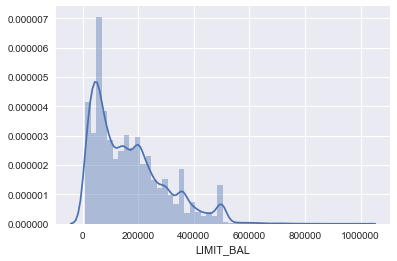

In [12]:
sns.distplot(data['LIMIT_BAL'])

In [19]:
q = data['LIMIT_BAL'].quantile(0.99)
data1 = data[data['LIMIT_BAL']<q]
data1['LIMIT_BAL'].describe()

count     28620.000000
mean     156302.923829
std      114685.218087
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      230000.000000
max      490000.000000
Name: LIMIT_BAL, dtype: float64

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


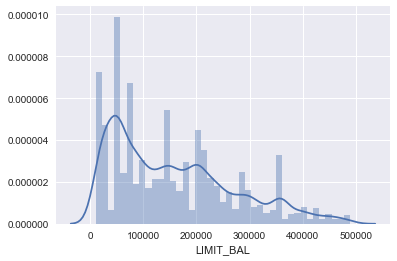

In [20]:
sns.distplot(data1['LIMIT_BAL'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


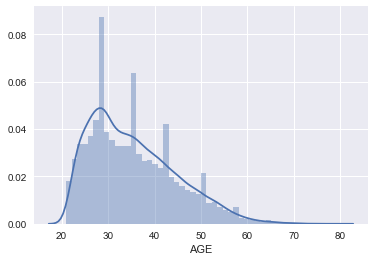

In [22]:
sns.distplot(data1['AGE'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


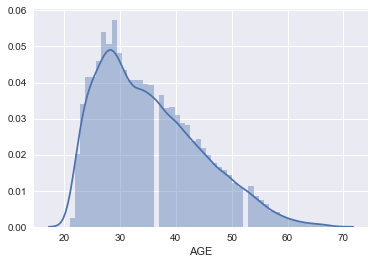

In [24]:
q = data1['AGE'].quantile(0.999)
data2 = data1[data1['AGE']<q]
data2['AGE'].describe()
sns.distplot(data2['AGE'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


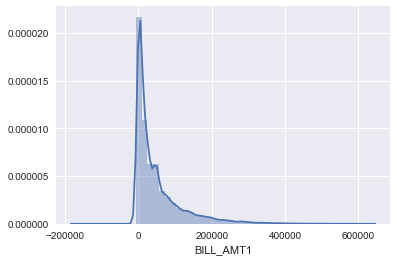

In [27]:
sns.distplot(data2['BILL_AMT1'])


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


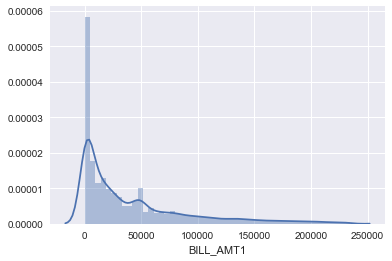

In [33]:
q1 = data2['BILL_AMT1'].quantile(0.97)
data3 = data2[data2['BILL_AMT1']<q1]
q2 = data3['BILL_AMT1'].quantile(0.01)
data4 = data3[data3['BILL_AMT1']>q2]
sns.distplot(data4['BILL_AMT1'])


C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


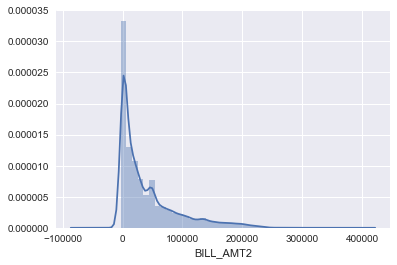

In [35]:
sns.distplot(data4['BILL_AMT2'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


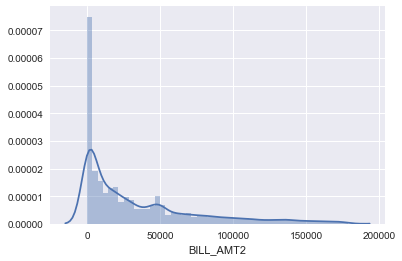

In [36]:
q1 = data4['BILL_AMT2'].quantile(0.97)
data5 = data4[data4['BILL_AMT2']<q1]
q2 = data5['BILL_AMT2'].quantile(0.01)
data6 = data5[data5['BILL_AMT2']>q2]
sns.distplot(data6['BILL_AMT2'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


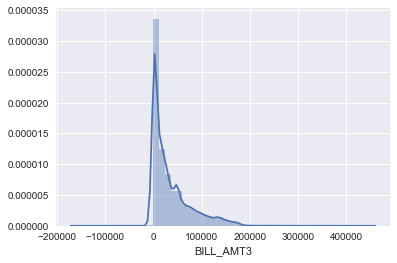

In [45]:
sns.distplot(data6['BILL_AMT3'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


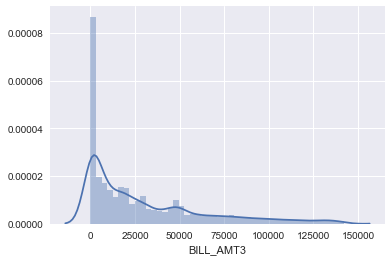

In [46]:
q1 = data6['BILL_AMT3'].quantile(0.97)
data7 = data6[data6['BILL_AMT3']<q1]
q2 = data7['BILL_AMT3'].quantile(0.01)
data8 = data7[data7['BILL_AMT3']>q2]
sns.distplot(data8['BILL_AMT3'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


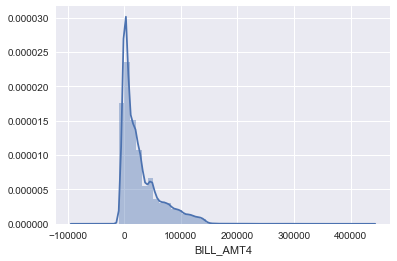

In [47]:
sns.distplot(data8['BILL_AMT4'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


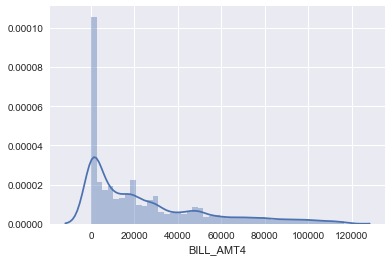

In [48]:
q1 = data8['BILL_AMT4'].quantile(0.97)
data9 = data8[data8['BILL_AMT4']<q1]
q2 = data9['BILL_AMT4'].quantile(0.01)
data10 = data9[data9['BILL_AMT4']>q2]
sns.distplot(data10['BILL_AMT4'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


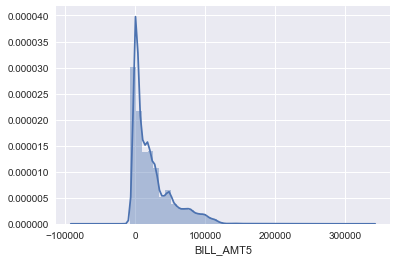

In [49]:
sns.distplot(data10['BILL_AMT5'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


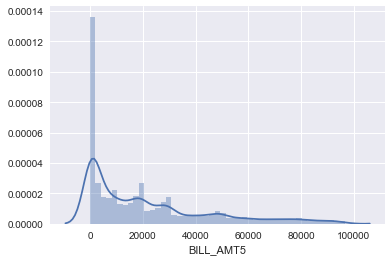

In [50]:
q1 = data10['BILL_AMT5'].quantile(0.97)
data11 = data10[data10['BILL_AMT5']<q1]
q2 = data11['BILL_AMT5'].quantile(0.01)
data12 = data11[data11['BILL_AMT5']>q2]
sns.distplot(data12['BILL_AMT5'])

In [ ]:
sns.distplot(data12['BILL_AMT6'])

In [ ]:
q1 = data12['BILL_AMT6'].quantile(0.97)
data13 = data12[data12['BILL_AMT6']<q1]
q2 = data3['BILL_AMT6'].quantile(0.01)
data4 = data3[data3['BILL_AMT6']>q2]
sns.distplot(data4['BILL_AMT6'])